# Dog Classifier
## Image Preprocessing

### Table of Contents

1. [Read Images](#read)
2. [Preprocessing](#preprocessing)
3. [Data Augmentation](#augmentation)
    1. [Flipping](#flipping)
    2. [Noise](#noise)
4. [Save preprocessed images](#save)

In [1]:
# Imports
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import yaml
from pathlib import Path

In [2]:
# Config file
config = yaml.safe_load(open("image_preprocessing.yml", encoding="utf-8"))

### Read Images<a id="read"></a>

In [3]:
raw_images_path = str(Path().resolve()) + config["input"]["folder"]

image_paths = list()
for root, dirs, files in os.walk(raw_images_path):
    for name in files:
        if name.endswith(config["input"]["extension"]):
            image_paths.append(os.path.join(root, name))

display("Number of raw images: {0}".format(len(image_paths)))

'Number of raw images: 450'

### Preprocessing<a id="preprocessing"></a>
Applies resizing and noise removal to the images

In [4]:
def remove_noise(images):
    """ Return 'images' without noise """
    no_noise = []
    for i in range(len(images)):
        blur = cv2.GaussianBlur(images[i], (5, 5), 0)
        no_noise.append(blur)
        
    return no_noise
    
    
def resize(images, height=220, width=220):
    """ Return 'images' resized """
    dim = (width, height)
    resized_images = []
    for i in range(len(images)):
        res = cv2.resize(images[i], dim, interpolation=cv2.INTER_LINEAR)
        resized_images.append(res)
        
    return resized_images


def processing(paths, height=220, width=220):
    """ Preprocess images in 'paths' """
    original_images = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in paths]

    images = resize(original_images, height, width)
#     images = remove_noise(images)
    
    return original_images, images
    
original_images, preprocessed_images = processing(image_paths, config["preprocessing"]["height"], 
                                                  config["preprocessing"]["width"])

Display one image to compare the *raw* and *preprocessed* images

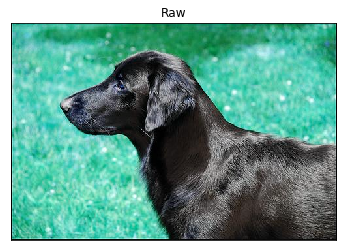

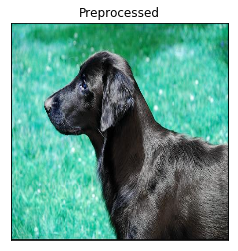

In [5]:
def display_one(a, title=""):
    """ Displays one image """
    plt.imshow(a), plt.title(title)
    plt.xticks([]), plt.yticks([])
    plt.show()
    

display_one(original_images[0], title="Raw")
display_one(preprocessed_images[0], title="Preprocessed")

### Data Augmentation<a id="augmentation"></a>
In order to increase our image dataset size, we are going to apply some *data augmentation* techniques.

#### Flipping<a id="flipping"></a>

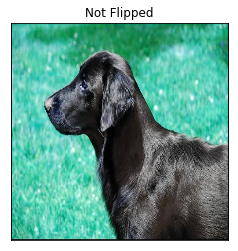

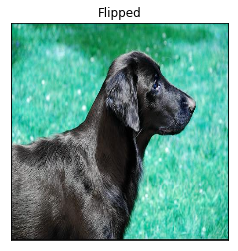

In [6]:
flipped_images = list()
for i, img in enumerate(preprocessed_images):
    flipped_images.append(np.fliplr(img))

display_one(preprocessed_images[0], title="Not Flipped")
display_one(flipped_images[0], title="Flipped")

#### Noise<a id="noise"></a>

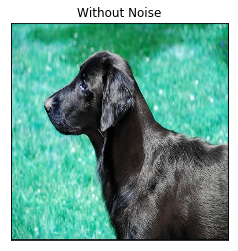

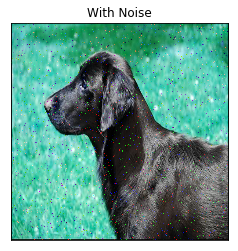

In [7]:
noised_images = list()
for i, img in enumerate(preprocessed_images):
    noised = img.copy()
    for index, x in np.ndenumerate(noised):
        if np.random.randint(low=0,high=50,size=1)[0] == 25: # 2% chances
            noised[index] = np.random.randint(low=0, high=255, size=1)[0] # New random value between 0 and 255
            
    noised_images.append(noised)

display_one(preprocessed_images[0], title="Without Noise")
display_one(noised_images[0], title="With Noise")

Appends augmentated images to *preprocessed_images* and creates new paths which are appended to *image_paths*

In [8]:
preprocessed_images = preprocessed_images + flipped_images + noised_images

flipped_image_paths = [img.replace(config["input"]["extension"], "_flipped" + config["input"]["extension"])  
                      for img in image_paths]
noised_image_paths = [img.replace(config["input"]["extension"], "_noised" + config["input"]["extension"])  
                      for img in image_paths]
image_paths = image_paths + flipped_image_paths + noised_image_paths

### Save preprocessed images<a id="save"></a>

In [9]:
preprocessed_images_path = str(Path().resolve()) + config["output"]["folder"]

if not os.path.exists(preprocessed_images_path):
    os.makedirs(preprocessed_images_path)

for path, img in zip(image_paths, preprocessed_images):    
    filename = Path(path).parts[-1].replace(config["input"]["extension"], config["output"]["extension"])
    folder = Path(path).parts[-2]
    
    
    if not os.path.exists(os.path.join(preprocessed_images_path, folder)):
        os.makedirs(os.path.join(preprocessed_images_path, folder))
        
    output_path = os.path.join(preprocessed_images_path, folder, filename)
    result = cv2.imwrite(output_path, img)
    if result is False:
        print("Error in {0}".format(output_path))